In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from config import *

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Define function to obtain tweets

def tweeter(handle):

    all_tweets = []
    
    for x in range(5):
        public_tweets = api.user_timeline(handle, page=x)
        all_tweets.append(public_tweets)
        tweet_list = [item for sublist in all_tweets for item in sublist]
    return tweet_list;

In [6]:
# Define function to analyze tweets

def vader(tweet):
    
    target_string = tweet['text']
    compound_score = analyzer.polarity_scores(target_string)['compound']
    return compound_score;

In [7]:
#Check rate limit status

status = api.rate_limit_status()
print(status['resources']['statuses']['/statuses/user_timeline']['remaining'])

900


In [7]:
# Analyze tweets
targets = ['@nytimes','@CNN','@FoxNews','@CBSNews','@BBCNorthAmerica']

news_scores = {}

for name in targets:
    tweet_sentiment = []
    for item in tweeter(name):
        tweet = {}
        tweet['score'] = vader(item)
        tweet_sentiment.append(tweet)
    news_scores[name] = tweet_sentiment

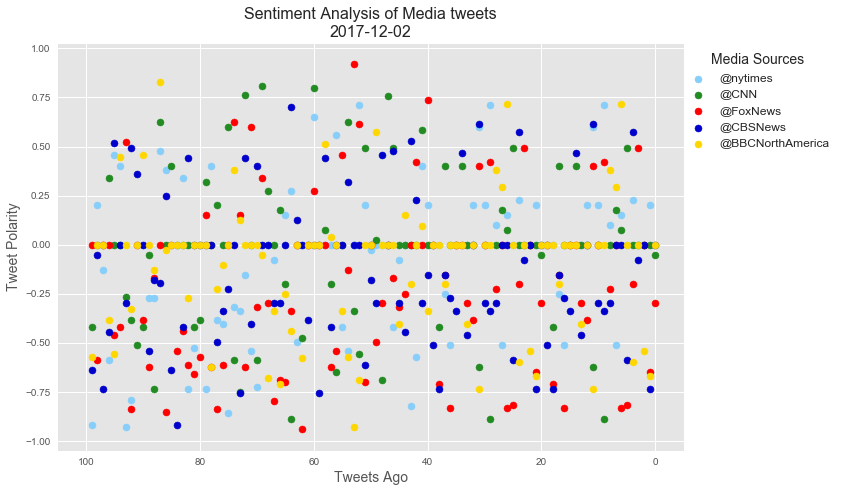

In [162]:
colors = ['#87CEFA','#228B22','#FF0000','#0000CD','#FFD700']
counter=0
compound = {}
name = []

plt.style.use('ggplot')
plt.figure(figsize=(10,7))

for key, value in news_scores.items():
    score_list = []
    time_list = []
    for x in range(len(value)):
        score_list.append(news_scores[key][x]['score'])
        time_list.append(x)
    plt.scatter(time_list, score_list, color=colors[counter], label=key)
    #plt.gca().invert_xaxis()
    counter = counter+1
    
    mean_score = float("{0:.2f}".format(np.mean(score_list)))
    compound[key] = mean_score
    name.append(key)
    
plt.title('Sentiment Analysis of Media tweets\n2017-12-02', size=16)
plt.xlabel('Tweets Ago', size=14)
plt.xlim(105,-5)

plt.ylabel('Tweet Polarity', size=14)
legend = plt.legend(bbox_to_anchor=(1.25,1), loc="upper right", fontsize=12)
legend.set_title('Media Sources', prop={'size':14})
#plt.savefig('images/Discrete_Tweet_Sentiment_Analysis.png')
plt.show()

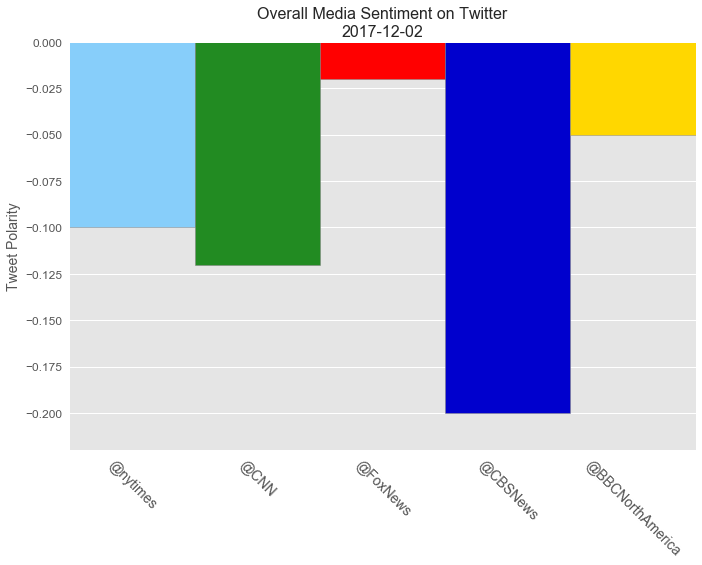

In [170]:
composite = pd.Series(compound)
composite = composite.reset_index().rename(columns={'index':'Twitter Name',0:'Composite Score'})

x_axis = np.arange(0, len(composite), 1)
tick_loc = [x+0.5 for x in x_axis]
colors = ['#87CEFA','#228B22','#FF0000','#0000CD','#FFD700']

plt.figure(figsize=(10,7))

plt.style.use('ggplot')
plt.bar(x_axis, composite['Composite Score'], align='edge', width=1.0, color=colors, edgecolor='gray')
plt.title('Overall Media Sentiment on Twitter\n2017-12-02', size=16)
plt.xticks(tick_loc, name, rotation=315, size=14)
plt.yticks(size=12)
plt.ylabel('Tweet Polarity', size=14)
plt.ylim(-0.22, 0)
plt.margins(0, 0.1)
plt.gca().xaxis.grid(False)

plt.show()